In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
data=pd.read_csv("Downloads/Salary_dataset.csv")

In [7]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Salary'>

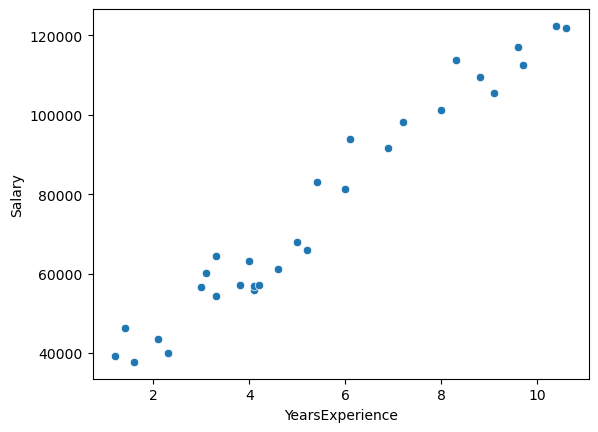

In [9]:
sns.scatterplot(data=data,x='YearsExperience',y='Salary')

In [10]:
X=data.YearsExperience
Y=data.Salary

In [11]:
X.shape
Y.shape

(30,)

In [12]:
m=X.shape[0]

In [84]:
def func(x,w,b):
   
    f=x*w+b
    return f

In [32]:
def cost_func(x,y,w,b):
    cost=0
    for i in range(m):
        f=x[i]*w+b
        cost+=(f-y[i])**2
    total=cost/(2*m)
    return total

In [33]:
def gradient(x,y,w,b):
    dj_dw=0
    dj_db=0
    for i in range(m):
        f=x[i]*w+b
        dj_dw+=(f-y[i])*x[i]
        dj_db+=f-y[i]
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db

In [43]:
def para_gradient_des(x,y,w,b,epoch,alpha):
    j=[]
    para=[]
    for i in range(epoch):
        dj_dw,dj_db=gradient(x,y,w,b)
        w=w-(alpha*dj_dw)
        b=b-(alpha*dj_db)
        j.append(cost_func(x,y,w,b))  
        para.append([w,b])

        if (i%100==0):
            print(f"Iteration:{i}/{epoch}\t costfunction:{j[-1]:0.2e}\n parameters w:{w:0.3e} b:{b:0.3e}")
    return w,b,j,para
    

In [87]:
w_in=0
b_in=0
alpha=0.01
epoch=1000
w_final,b_final,cost,para=para_gradient_des(X,Y,w_in,b_in,epoch,alpha)


Iteration:0/1000	 costfunction:1.30e+09
 parameters w:4.850e+03 b:7.600e+02
Iteration:100/1000	 costfunction:5.22e+07
 parameters w:1.219e+04 b:6.190e+03
Iteration:200/1000	 costfunction:3.99e+07
 parameters w:1.168e+04 b:9.659e+03
Iteration:300/1000	 costfunction:3.17e+07
 parameters w:1.126e+04 b:1.248e+04
Iteration:400/1000	 costfunction:2.63e+07
 parameters w:1.093e+04 b:1.478e+04
Iteration:500/1000	 costfunction:2.27e+07
 parameters w:1.065e+04 b:1.665e+04
Iteration:600/1000	 costfunction:2.03e+07
 parameters w:1.043e+04 b:1.818e+04
Iteration:700/1000	 costfunction:1.87e+07
 parameters w:1.025e+04 b:1.942e+04
Iteration:800/1000	 costfunction:1.77e+07
 parameters w:1.010e+04 b:2.043e+04
Iteration:900/1000	 costfunction:1.70e+07
 parameters w:9.978e+03 b:2.125e+04


In [88]:
print(f"[{w_final:8.4f},{b_final:8.4f}] are the gradient descent having costfunction")

[9880.8140,21912.5892] are the gradient descent having costfunction


In [89]:
def predict(x):
    print(f"prediction of salary for {x} years of experience is {(w_final*x)+b_final}")

In [94]:
predict(4.4)

prediction of salary for 4.4 years of experience is 65388.170804499445


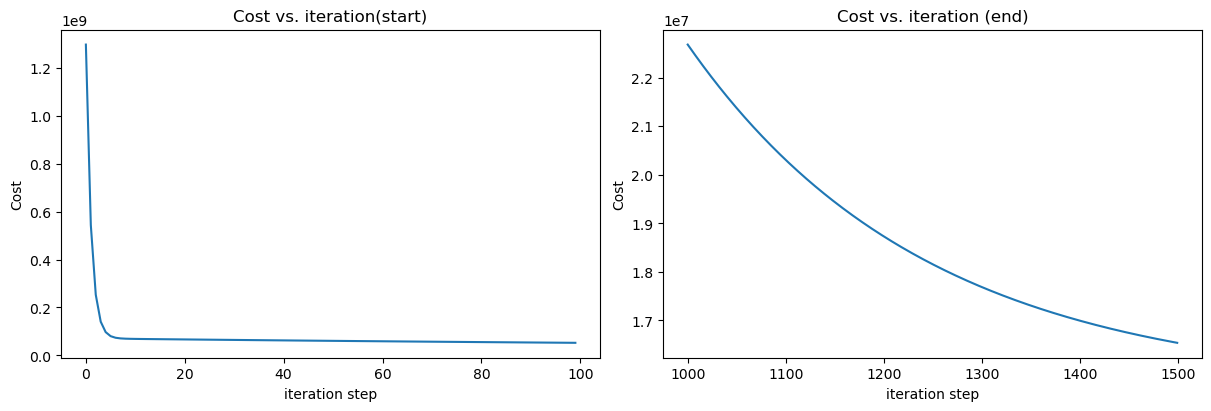

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost[:100])
ax2.plot(1000 + np.arange(len(cost[500:])), cost[500:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

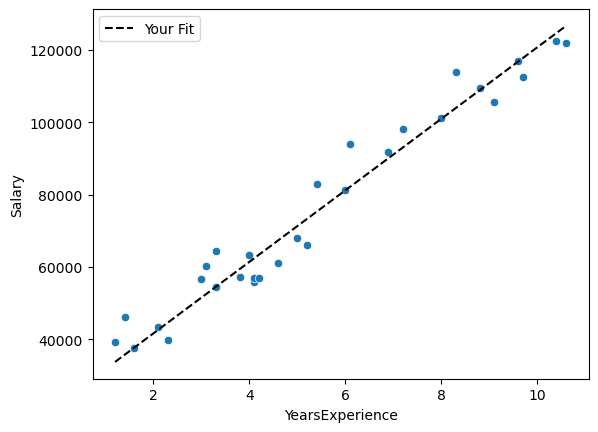

In [92]:
sns.scatterplot(data=data,x='YearsExperience',y='Salary')
plt.plot(X, func(X,w_final,b_final), color='black', linestyle='--', label='Your Fit')
plt.legend()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

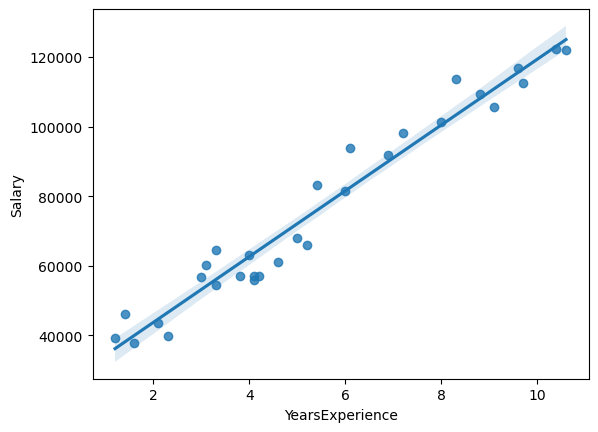

In [93]:
sns.regplot(data=data,x='YearsExperience',y='Salary')